## Simple Linear Regression

**Business Problem**: In this series we are going to learn about Simple Linear Regression. We will review a data set about `Salary` and `Experience in age`  . As a data scienctist, your job is to help the HR deaprtment  predict the salary of a person based on his years of experience, if he or she accepts the job offer. If you offer too low, the person will not accept the job offer. If you offer to high, then you will be wating company's resources($$).

### Getting the dataset
[Simple Regression](http://www.superdatascience.com/wp-content/uploads/2017/02/Simple_Linear_Regression.zip)


### What is Simple Linear regression?
![slr-intro.PNG](slr-intro.PNG)

If we draw a graph of `salary` vs `Experience`, you will see a linear trend.
![linearGraph](linearGraph.PNG)

Based on the graph, it is clear that this is a positive slope. If the co-effiecinet `b1` is big, the slope is going to steeper, which means that if there is small increase in the age, then there will be a big increase in the salary. If the value of `b1` is small, the slope is going to be more gentle and with change is experience, the salary is going to increase gently.

### How is a trendline determined by a model?
The model tries to find the trendline by determining the least of `Sum of errors`. In the below diagram, imagine the `red cross` as observed value and `green cross` as determined value(model prediction). The algorithm finds the difference between the and squares them. The algorithm does this for all the observed values and deteremines the slope of trendline which given the minimum of **SUM(y - y<sup>^</sup>)<sup>2</sup>**

![trendline](trendline.PNG)

### Steps to solve the problem.

- **Step 1: Data Pre processing**
  
We will follow the same process as we did in fisrt series. We will import the libraries and read the csv file and take a look at the data.
![dataset](dataset.PNG)

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('../Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

   - **Step 2: Split the data into training and test data**
    
    Since there are 30 rows, we will divide the data in 20:10(traing:test)

In [7]:
#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=0)

![data-split.PNG](data-split.PNG)

- **Step 3: Feature Scaling**
We won't be feature scaling or normalizing here because the library that will execute the model takes care of it. So we are going to skip this step.


- **Step 4: Train the model**
   At this point our data pre-processing is complete and we will use the library to run the regression on the training data set.

In [9]:
#Fittiing the Simple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression( )
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In the above code, we have trained our model and saved it in the variable `regressor`. 

- **Step 5: Predict and compare with actual test set**

Next we are going to predict the values of test sample and get the predicted results in variable `y_pred`.

In [12]:
# Predicting the salary of the test sample
y_pred = regressor.predict(X_test)

Let's see how did the model predict.
![predicted](predicted.PNG)

- **Step 5: Plot the data**

To better understand, let's create plot the trendline of our model and look for two things
1. What is the fit of trendline for training data?
2. What is the fit of trendline on test data against predicted values?


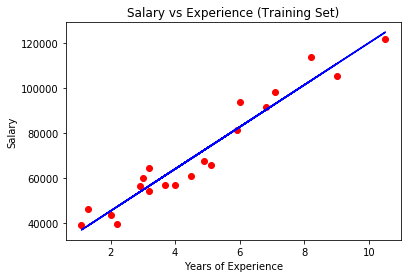

In [11]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


Here's how the graph would like for **Training data** 
![trainingPlot.PNG](trainingPlot.PNG)
Couple of things to note. The scatter function just plots the x,y values on the graph as red dots
> plt.scatter(X_train, y_train, color='red')

The plot function also maps the data as blue dots but it joins them via line starting from first mapping to the last. Additionally, you will also notice that in the y-axis, we have passed model function `predict(X_train)` and **not**  `predict(x_test)` because, we want to use the function created using the training set - `y=mx+c`. 
> plt.plot(X_train, regressor.predict(X_train), color='blue')

#### Plot vs Scatter
The primary difference of plt.scatter from plt.plot is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

The purpose of the above code is to show trendline against the training data points(red dots). If we wantted to show predicted line as set plotted `dots`, we would have used 
>plt.scatter(X_train, regressor.predict(X_train), color='blue')

In that case the graph would have looked like this.
![plot-cs-scatter.PNG](plot-cs-scatter.PNG)

Here's how the graph would like for **Test data** 

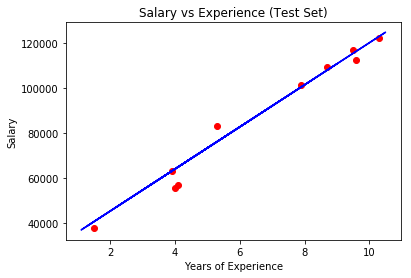

In [13]:
#Plot the data against test set
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


![trendline_test.PNG](trendline_test.PNG)
As explained earlier, the trend line is what the model was trained against training data set. Hence
> plt.plot(X_train, regressor.predict(X_train), color='blue')

and **not** 
> plt.plot(X_test, regressor.predict(X_test), color='blue')

Now let's create a more complete picture -  the training set(RED DOTS), test set(GREEN DOTS) and predicted value (BLACK DOTS). 

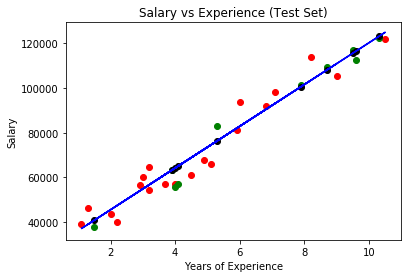

In [14]:
#Plot the data against test set
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_test, color='green')
plt.scatter(X_test, y_pred, color='black')

plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

So you will notice that all the `black` dots lie on the trend line because they are created using the trendline equation. 

That's it. We just trained a model using Simple linear regressiona and predicted the values, then compared it against test data.